In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np

In [18]:
# Define the Autoencoder class
class Autoencoder(nn.Module):
    def __init__(self, in_shape):
        super().__init__()
        c, h, w = in_shape
        self.encoder = nn.Sequential(
            nn.Linear(c * h * w, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, c * h * w),
            nn.Sigmoid()
        )

    def forward(self, x):
        bs, c, h, w = x.size()
        x = x.view(bs, -1)
        x = self.encoder(x)
        x = self.decoder(x)
        x = x.view(bs, c, h, w)
        return x

In [19]:
# Function to train the autoencoder
def train(net, loader, loss_func, optimizer):
    net.train()
    for inputs, _ in loader:
        inputs = Variable(inputs)

        output = net(inputs)
        loss = loss_func(output, inputs)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [20]:
# Function to test the trained autoencoder using random data
def test(net, test_data):
    net.eval()
    with torch.no_grad():
        random_input = torch.randn(1, 3, 64, 64)  # Random data with shape (1, 3, 64, 64)
        reconstructed_output = net(random_input)

        # Visualize original and reconstructed images
        original_image = np.transpose(random_input.squeeze().numpy(), (1, 2, 0))
        reconstructed_image = np.transpose(reconstructed_output.squeeze().numpy(), (1, 2, 0))

        plt.subplot(1, 2, 1)
        plt.title("Original Image")
        plt.imshow(original_image)

        plt.subplot(1, 2, 2)
        plt.title("Reconstructed Image")
        plt.imshow(reconstructed_image)

        plt.show()

In [21]:
# Function to test the trained autoencoder using random data
def test(net, test_data):
    net.eval()
    with torch.no_grad():
        random_input = torch.randn(1, 3, 64, 64)  # Random data with shape (1, 3, 64, 64)
        reconstructed_output = net(random_input)

        # Visualize original and reconstructed images
        original_image = np.transpose(random_input.squeeze().numpy(), (1, 2, 0))
        reconstructed_image = np.transpose(reconstructed_output.squeeze().numpy(), (1, 2, 0))

        plt.subplot(1, 2, 1)
        plt.title("Original Image")
        plt.imshow(original_image)

        plt.subplot(1, 2, 2)
        plt.title("Reconstructed Image")
        plt.imshow(reconstructed_image)

        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


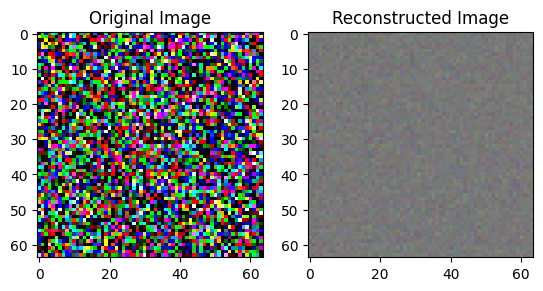

In [22]:


# Set random seed for reproducibility
torch.manual_seed(42)

# Instantiate the autoencoder
autoencoder = Autoencoder(in_shape=(3, 64, 64))

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Generate random training data (replace this with your DataLoader)
train_data = torch.randn(100, 3, 64, 64)  # Random data with shape (100, 3, 64, 64)

# Train the autoencoder
for epoch in range(10):  # Adjust the number of epochs as needed
    train(autoencoder, [(train_data, None)], criterion, optimizer)

# Test the autoencoder using random data
test(autoencoder, train_data)
